In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, GlobalAveragePooling2D, Layer, Flatten
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense
from tensorflow.keras.applications import VGG16
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

In [2]:
from google.colab import drive
drive.mount('/content/gdrive/')

Mounted at /content/gdrive/


In [3]:
!unzip "/content/gdrive/MyDrive/cam.zip"

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
  inflating: raw-img/ragno/OIP-MVQChNQpHiMZEVMPehrvoAHaE6.jpeg  
  inflating: raw-img/ragno/OIP-MVdIFDAFpNyK_XCpwkDIWgHaFj.jpeg  
  inflating: raw-img/ragno/OIP-MYY_8k5AHqMJwTCNXfH6rwHaFj.jpeg  
  inflating: raw-img/ragno/OIP-MZEVXuoMsATG8u_UuTQ6hAHaE8.jpeg  
  inflating: raw-img/ragno/OIP-MZg0tznDRE95AMfyuutuYAHaE6.jpeg  
  inflating: raw-img/ragno/OIP-M_r9DkR2X5gP0P5-z8wPYQHaE7.jpeg  
  inflating: raw-img/ragno/OIP-M_xDUSzjlF3-w9XHCm93cgHaFF.jpeg  
  inflating: raw-img/ragno/OIP-MbI4-bMyutRX3X382IAVcQAAAA.jpeg  
  inflating: raw-img/ragno/OIP-MbMksZdD7gomsC9fd6cpKgHaHJ.jpeg  
  inflating: raw-img/ragno/OIP-Md4AMcvjaHcivJqeW06wEwHaFW.jpeg  
  inflating: raw-img/ragno/OIP-MgCgailkT5XkO1XczzQCngHaLK.jpeg  
  inflating: raw-img/ragno/OIP-MgrKq05YHGXsgj1AmYIyJQHaE8.jpeg  
  inflating: raw-img/ragno/OIP-MhRGx7d8nbnHBuqrsO00EQHaFo.jpeg  
  inflating: raw-img/ragno/OIP-MiVgMXcKGQdog2KGe7i0YQHaHh.jpeg  
  inflating: raw-img/ragno/OIP-Mis0lJf3Xbf3ulUg4DQ_EwH

In [4]:
batch_size=32
img_size=224

datagen = ImageDataGenerator(
    rescale=1/255, rotation_range=20,width_shift_range=0.2,height_shift_range=0.2,
    shear_range=0.2, zoom_range=0.2, horizontal_flip=True, fill_mode='nearest',validation_split=0.15)

In [5]:
train_generator = datagen.flow_from_directory("/content/raw-img",target_size=(img_size, img_size), subset = 'training')

Found 22257 images belonging to 10 classes.


In [6]:
validation_generator = datagen.flow_from_directory("/content/raw-img",target_size=(img_size, img_size),subset = 'validation')

Found 3922 images belonging to 10 classes.


In [7]:
base_model = VGG16(include_top=False,weights="imagenet",input_shape = (img_size,img_size,3))

58889256/58889256 [==============================] - 0s 0us/step


In [8]:
base_model.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [9]:
base_model.layers[-2].output

<KerasTensor: shape=(None, 14, 14, 512) dtype=float32 (created by layer 'block5_conv3')>

In [10]:
last = base_model.layers[-2].output

In [11]:
base_model.layers[-2].output
last = base_model.layers[-2].output
x = GlobalAveragePooling2D()(last)
x = Dense(512,'relu')(x)
x = Dense(10, activation='softmax')(x)
model = Model(inputs=base_model.input, outputs=x)

In [12]:
model.compile(loss='categorical_crossentropy',
              optimizer=Adam(learning_rate=0.0001),
              metrics=['accuracy'])

In [13]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [14]:
history = model.fit(train_generator,
                    epochs=15,
                    validation_data=validation_generator)

Epoch 1/15
696/696 [==============================] - 554s 756ms/step - loss: 0.8172 - accuracy: 0.7271 - val_loss: 0.4788 - val_accuracy: 0.8460
Epoch 2/15
696/696 [==============================] - 488s 700ms/step - loss: 0.3937 - accuracy: 0.8729 - val_loss: 0.3203 - val_accuracy: 0.8929
Epoch 3/15
696/696 [==============================] - 479s 689ms/step - loss: 0.2970 - accuracy: 0.9060 - val_loss: 0.3159 - val_accuracy: 0.8978
Epoch 4/15
696/696 [==============================] - 485s 697ms/step - loss: 0.2440 - accuracy: 0.9239 - val_loss: 0.2747 - val_accuracy: 0.9082
Epoch 5/15
696/696 [==============================] - 483s 694ms/step - loss: 0.2228 - accuracy: 0.9288 - val_loss: 0.2275 - val_accuracy: 0.9329
Epoch 6/15
696/696 [==============================] - 483s 694ms/step - loss: 0.1937 - accuracy: 0.9387 - val_loss: 0.2471 - val_accuracy: 0.9207
Epoch 7/15
696/696 [==============================] - 487s 699ms/step - loss: 0.1756 - accuracy: 0.9450 - val_loss: 0.1964 -

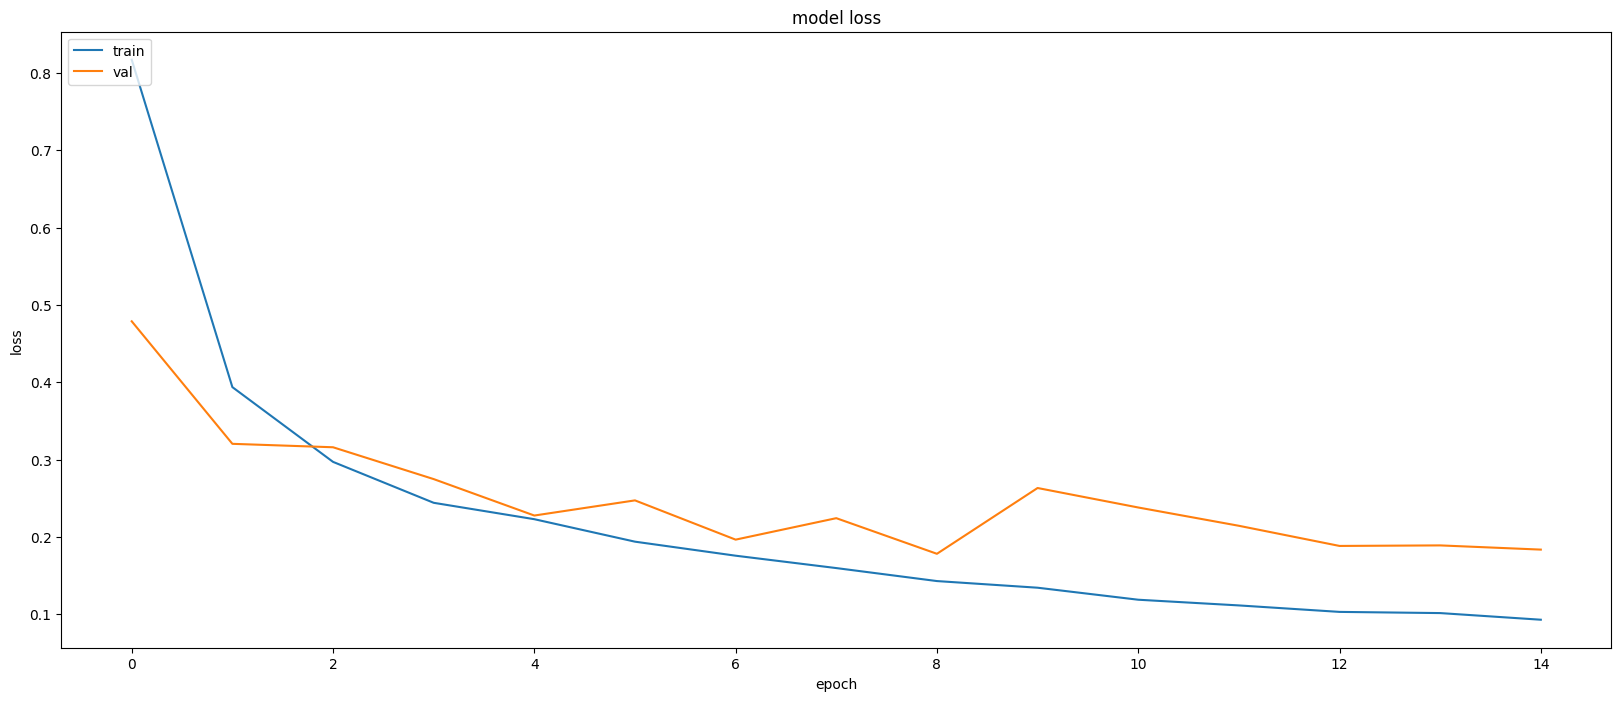

In [15]:
plt.figure(figsize=(20,8))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

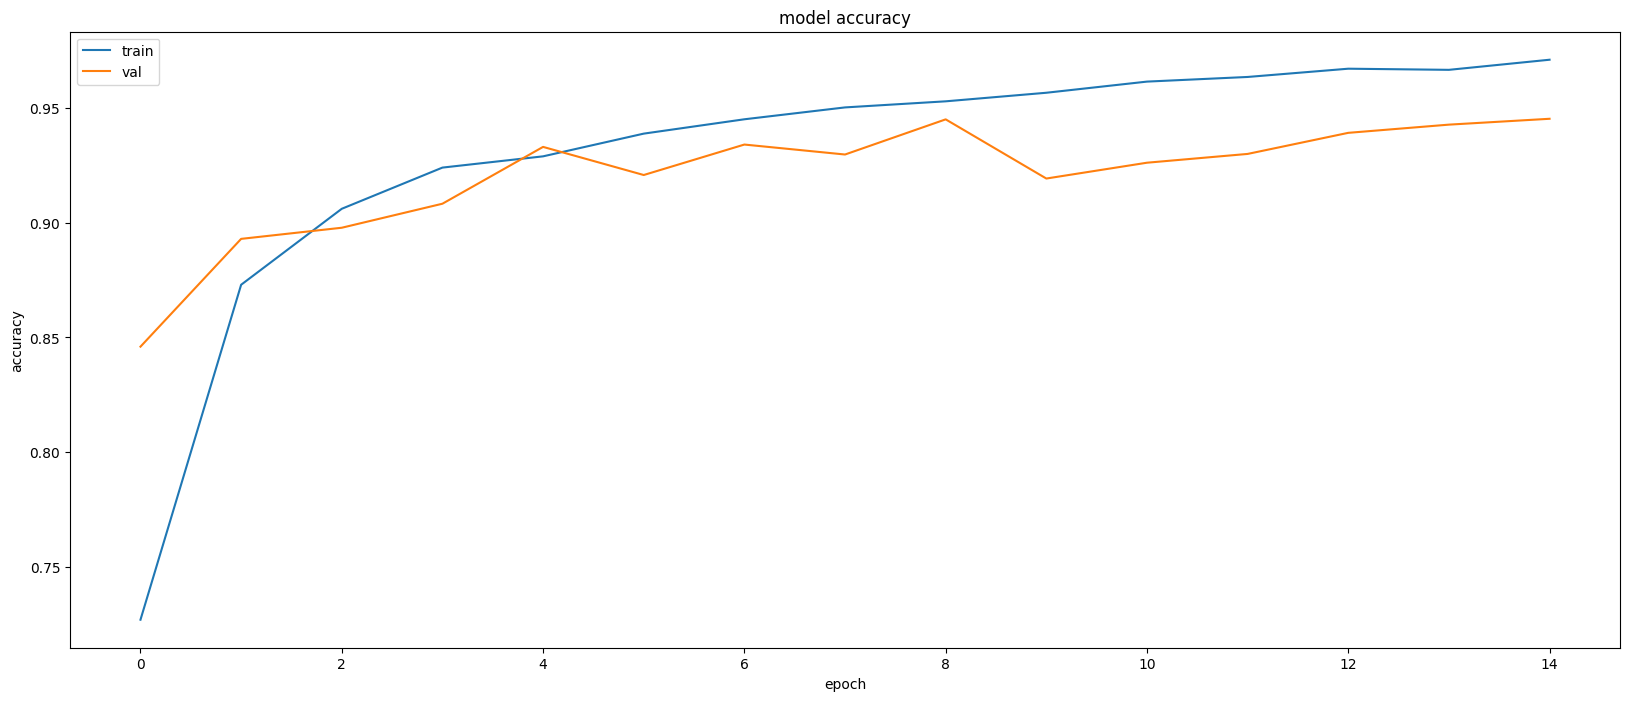

In [16]:
plt.figure(figsize=(20,8))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [17]:
from sklearn.metrics import classification_report

In [19]:
len(validation_generator.classes)

3922

In [20]:
y_val = validation_generator.classes
y_pred = model.predict(validation_generator)

123/123 [==============================] - 58s 467ms/step


In [21]:
y_pred = np.argmax(y_pred,axis=1)

In [22]:
print(classification_report(y_val,y_pred))

              precision    recall  f1-score   support

           0       0.20      0.19      0.19       729
           1       0.09      0.10      0.10       393
           2       0.05      0.05      0.05       216
           3       0.10      0.09      0.10       316
           4       0.10      0.11      0.11       464
           5       0.09      0.09      0.09       250
           6       0.12      0.13      0.12       279
           7       0.08      0.08      0.08       273
           8       0.20      0.20      0.20       723
           9       0.09      0.09      0.09       279

    accuracy                           0.13      3922
   macro avg       0.11      0.11      0.11      3922
weighted avg       0.13      0.13      0.13      3922



In [23]:
class_indices = validation_generator.class_indices
indices = {v:k for k,v in class_indices.items()}

In [24]:
filenames = validation_generator.filenames

In [25]:
val_df = pd.DataFrame()
val_df['filename'] = filenames
val_df['actual'] = y_val
val_df['predicted'] = y_pred
val_df['actual'] = val_df['actual'].apply(lambda x: indices[x])
val_df['predicted'] = val_df['predicted'].apply(lambda x: indices[x])
val_df.loc[val_df['actual']==val_df['predicted'],'Same'] = True
val_df.loc[val_df['actual']!=val_df['predicted'],'Same'] = False
val_df.head(10)

filename actual   predicted   Same
0      cane/OIF-e2bexWrojgtQnAPPcUfOWQ.jpeg   cane  scoiattolo  False
1  cane/OIP---A27bIBcUgX1qkbpZOPswHaFS.jpeg   cane  scoiattolo  False
2  cane/OIP---ZIdwfUcJeVxnh47zppcQHaFj.jpeg   cane        cane   True
3  cane/OIP---ZRsOF7zsMqhW30WeF8-AHaFj.jpeg   cane    farfalla  False
4  cane/OIP---_cJbI6Ei26w5bW1urHewHaCf.jpeg   cane       gatto  False
5  cane/OIP---cByAiEbIxIAleGo9AqOQAAAA.jpeg   cane       ragno  False
6  cane/OIP--0C2kq6I68beB3DduLoxMgHaEf.jpeg   cane       mucca  False
7  cane/OIP--0CZnfLuBERVtzRm2QbB3gHaK4.jpeg   cane      pecora  False
8  cane/OIP--1QXriWyOTJg-9fEwbznmgHaI4.jpeg   cane       ragno  False
9  cane/OIP--2uTtzjaszBfEMCROuLN3wHaLH.jpeg   cane       ragno  False

In [26]:
val_df = val_df.sample(frac=1).reset_index(drop=True)

In [27]:
val_df

filename    actual   predicted  \
0      cavallo/OIP--RiUPOTBjthmPdFJET-JHQHaJ4.jpeg   cavallo       ragno   
1                                 gallina/166.jpeg   gallina        cane   
2     farfalla/OIP-1SgDJSK11RSVS8hdNpyECgHaIU.jpeg  farfalla       gatto   
3         cane/OIP-51jFu05q2G6kb2ys6OROkQHaGd.jpeg      cane    elefante   
4         cane/OIP-5mOEUoZ4dvPFyOTO52GvLwHaEo.jpeg      cane     gallina   
...                                            ...       ...         ...   
3917     mucca/OIP-2m0N5Sp1KaHVJfrCr5RrRAHaFc.jpeg     mucca     cavallo   
3918     ragno/OIP-3GWPAvZnSrNAwTccinCX6wHaFr.jpeg     ragno  scoiattolo   
3919      cane/OIP-6CdpN2T1VMVhWM7BEhc5eAHaHO.jpeg      cane       ragno   
3920  farfalla/OIP-7a0hJkFYoZMF2_sqmAzWnwHaFe.jpeg  farfalla  scoiattolo   
3921      cane/OIP-3IJXfpGAhUo0Z_u9oSP9qAHaFj.jpeg      cane     gallina   

       Same  
0     False  
1     False  
2     False  
3     False  
4     False  
...     ...  
3917  False  
3918  False  
3919  False  
3920  False  
3921  False  

[3922 rows x 4 columns]

In [28]:
def readImage(path):
    img = load_img(path,color_mode='rgb',target_size=(img_size,img_size))
    img = img_to_array(img)
    img = img/255.

    return img

def display_images(temp_df):
    temp_df = temp_df.reset_index(drop=True)
    plt.figure(figsize = (20 , 20))
    n = 0
    for i in range(15):
        n+=1
        plt.subplot(5 , 5, n)
        plt.subplots_adjust(hspace = 0.5 , wspace = 0.3)
        image = readImage(f"/content/raw-img/{temp_df.filename[i]}")
        plt.imshow(image)
        plt.title(f'A: {temp_df.actual[i]} P: {temp_df.predicted[i]}')

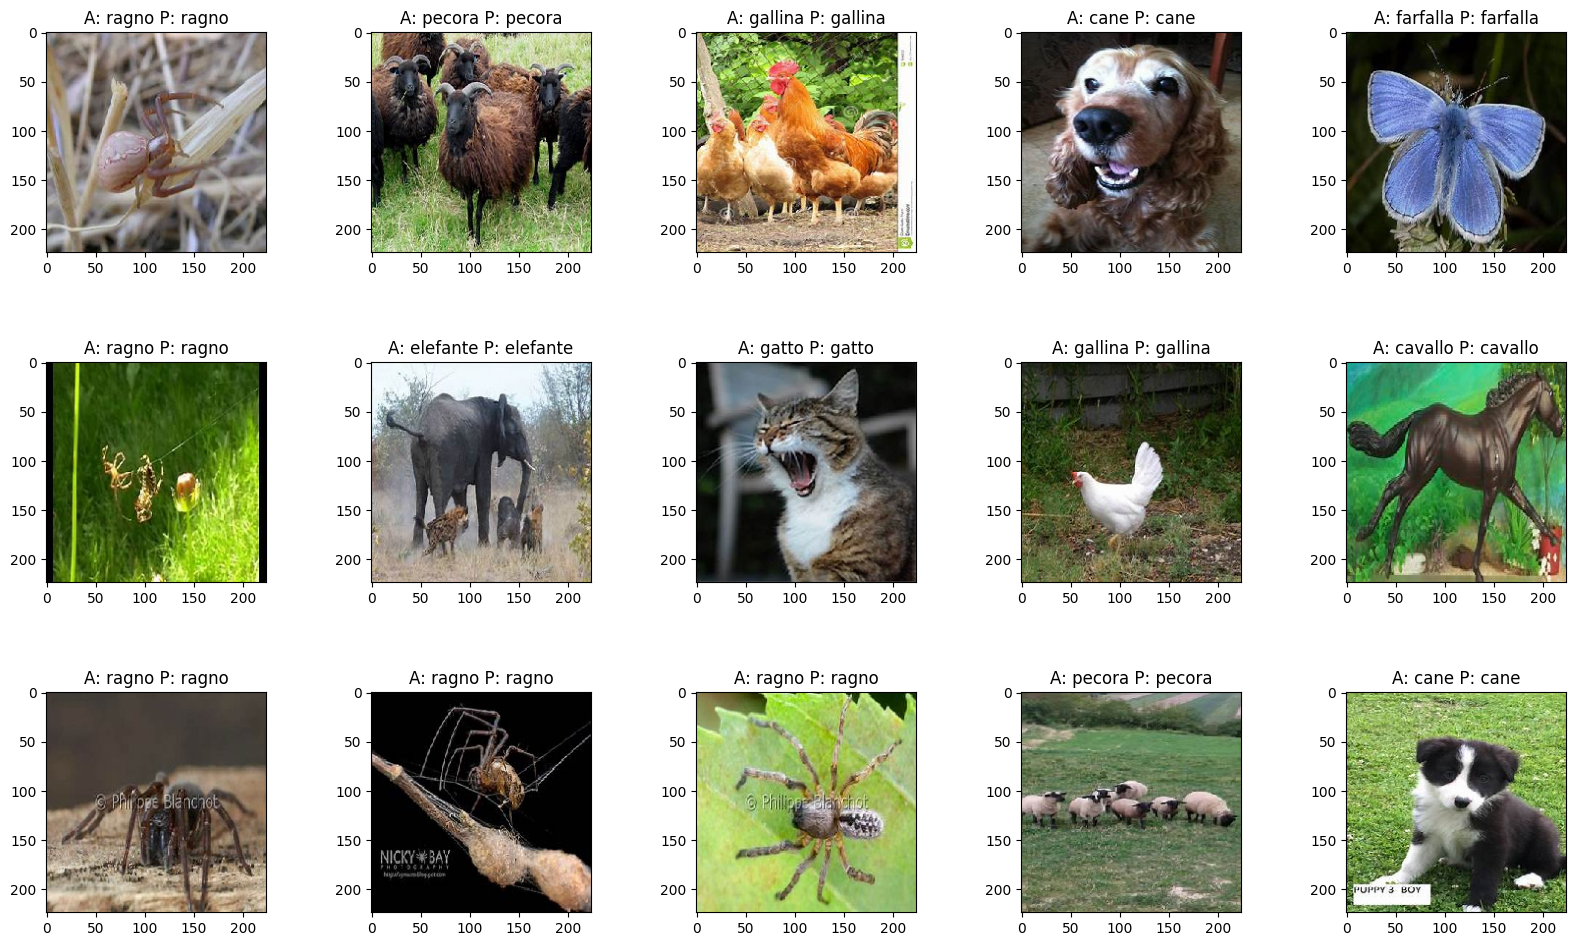

In [29]:
display_images(val_df[val_df['Same']==True])

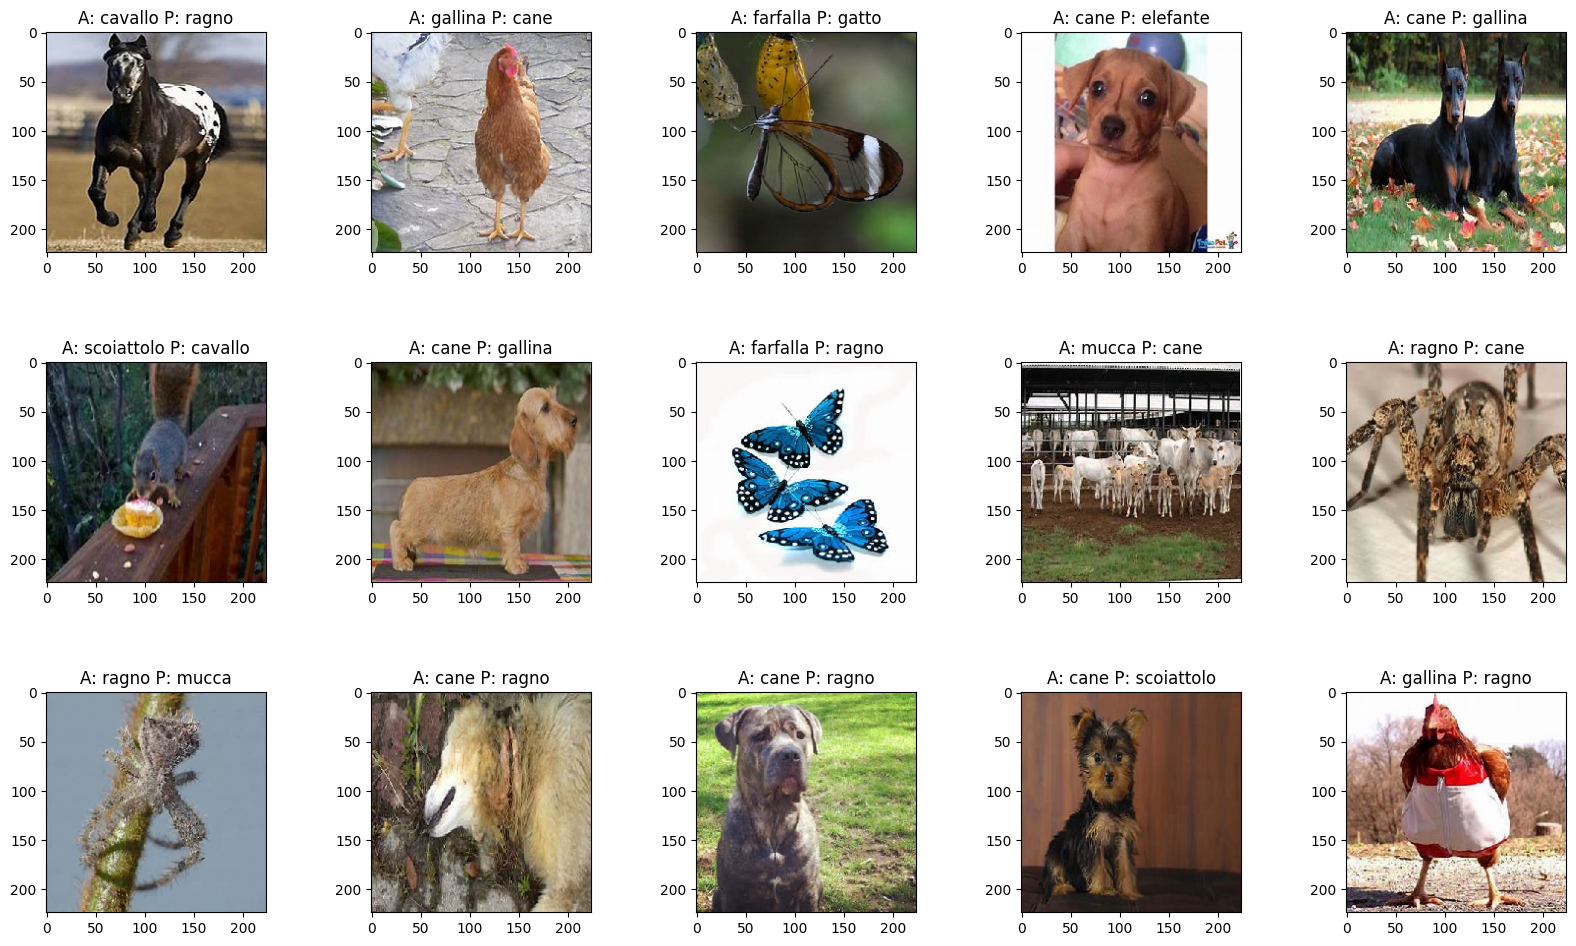

In [30]:
display_images(val_df[val_df['Same']!=True])

In [31]:
def make_gradcam_heatmap(img_array, model, pred_index=None):

    grad_model = Model(inputs=model.inputs, outputs=[model.layers[-4].output, model.output])

    with tf.GradientTape() as tape:
        last_conv_layer_output, preds = grad_model(img_array)
        if pred_index is None:
            pred_index = tf.argmax(preds[0])
        class_channel = preds[:, pred_index]

    grads = tape.gradient(class_channel, last_conv_layer_output)

    pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))

    last_conv_layer_output = last_conv_layer_output[0]
    heatmap = last_conv_layer_output @ pooled_grads[..., tf.newaxis]
    heatmap = tf.squeeze(heatmap)

    heatmap = tf.maximum(heatmap, 0) / tf.math.reduce_max(heatmap)
    return heatmap.numpy(), preds

In [32]:
import matplotlib.cm as cm

In [33]:
val_df

filename    actual   predicted  \
0      cavallo/OIP--RiUPOTBjthmPdFJET-JHQHaJ4.jpeg   cavallo       ragno   
1                                 gallina/166.jpeg   gallina        cane   
2     farfalla/OIP-1SgDJSK11RSVS8hdNpyECgHaIU.jpeg  farfalla       gatto   
3         cane/OIP-51jFu05q2G6kb2ys6OROkQHaGd.jpeg      cane    elefante   
4         cane/OIP-5mOEUoZ4dvPFyOTO52GvLwHaEo.jpeg      cane     gallina   
...                                            ...       ...         ...   
3917     mucca/OIP-2m0N5Sp1KaHVJfrCr5RrRAHaFc.jpeg     mucca     cavallo   
3918     ragno/OIP-3GWPAvZnSrNAwTccinCX6wHaFr.jpeg     ragno  scoiattolo   
3919      cane/OIP-6CdpN2T1VMVhWM7BEhc5eAHaHO.jpeg      cane       ragno   
3920  farfalla/OIP-7a0hJkFYoZMF2_sqmAzWnwHaFe.jpeg  farfalla  scoiattolo   
3921      cane/OIP-3IJXfpGAhUo0Z_u9oSP9qAHaFj.jpeg      cane     gallina   

       Same  
0     False  
1     False  
2     False  
3     False  
4     False  
...     ...  
3917  False  
3918  False  
3919  False  
3920  False  
3921  False  

[3922 rows x 4 columns]

In [35]:
def gradCAMImage(image):
    path = f"/content/raw-img/{image}"
    img = readImage(path)
    img = np.expand_dims(img,axis=0)
    heatmap,preds = make_gradcam_heatmap(img,model)

    img = load_img(path)
    img = img_to_array(img)
    heatmap = np.uint8(255 * heatmap)

    # Use jet colormap to colorize heatmap
    jet = cm.get_cmap("jet")

    # Use RGB values of the colormap
    jet_colors = jet(np.arange(256))[:, :3]
    jet_heatmap = jet_colors[heatmap]

    # Create an image with RGB colorized heatmap
    jet_heatmap = tf.keras.preprocessing.image.array_to_img(jet_heatmap)
    jet_heatmap = jet_heatmap.resize((img.shape[1], img.shape[0]))
    jet_heatmap = tf.keras.preprocessing.image.img_to_array(jet_heatmap)

    # Superimpose the heatmap on original image
    superimposed_img = jet_heatmap * 0.8 + img
    superimposed_img = tf.keras.preprocessing.image.array_to_img(superimposed_img)

    return superimposed_img

In [36]:
def gradcam_of_images(correct_class):
    grad_images = []
    title = []
    temp_df = val_df[val_df['Same']==correct_class]
    temp_df = temp_df.reset_index(drop=True)
    for i in range(15):
        image = temp_df.filename[i]
        grad_image = gradCAMImage(image)
        grad_images.append(grad_image)
        title.append(f"A: {temp_df.actual[i]} P: {temp_df.predicted[i]}")

    return grad_images, title

In [37]:
correctly_classified, c_titles = gradcam_of_images(correct_class=True)
misclassified, m_titles = gradcam_of_images(correct_class=False)

<ipython-input-35-62e9556c0fe5>:12: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  jet = cm.get_cmap("jet")


In [38]:
def display_heatmaps(classified_images,titles):
    plt.figure(figsize = (20 , 20))
    n = 0
    for i in range(15):
        n+=1
        plt.subplot(5 , 5, n)
        plt.subplots_adjust(hspace = 0.5 , wspace = 0.3)
        plt.imshow(classified_images[i])
        plt.title(titles[i])
    plt.show()

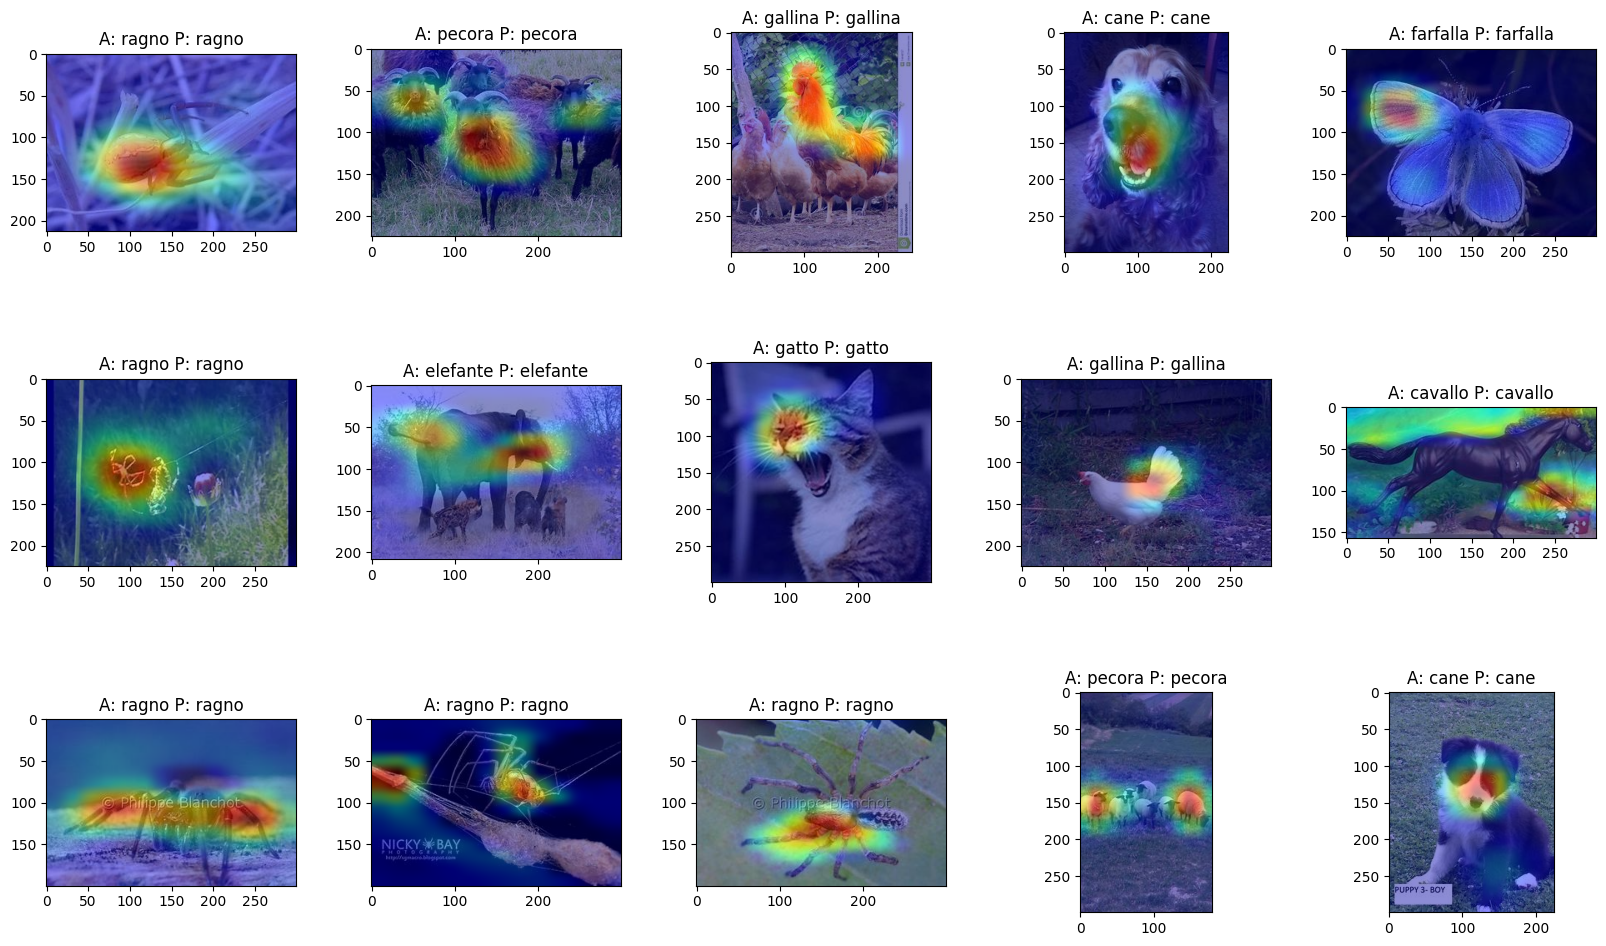

In [39]:
display_heatmaps(correctly_classified,c_titles)

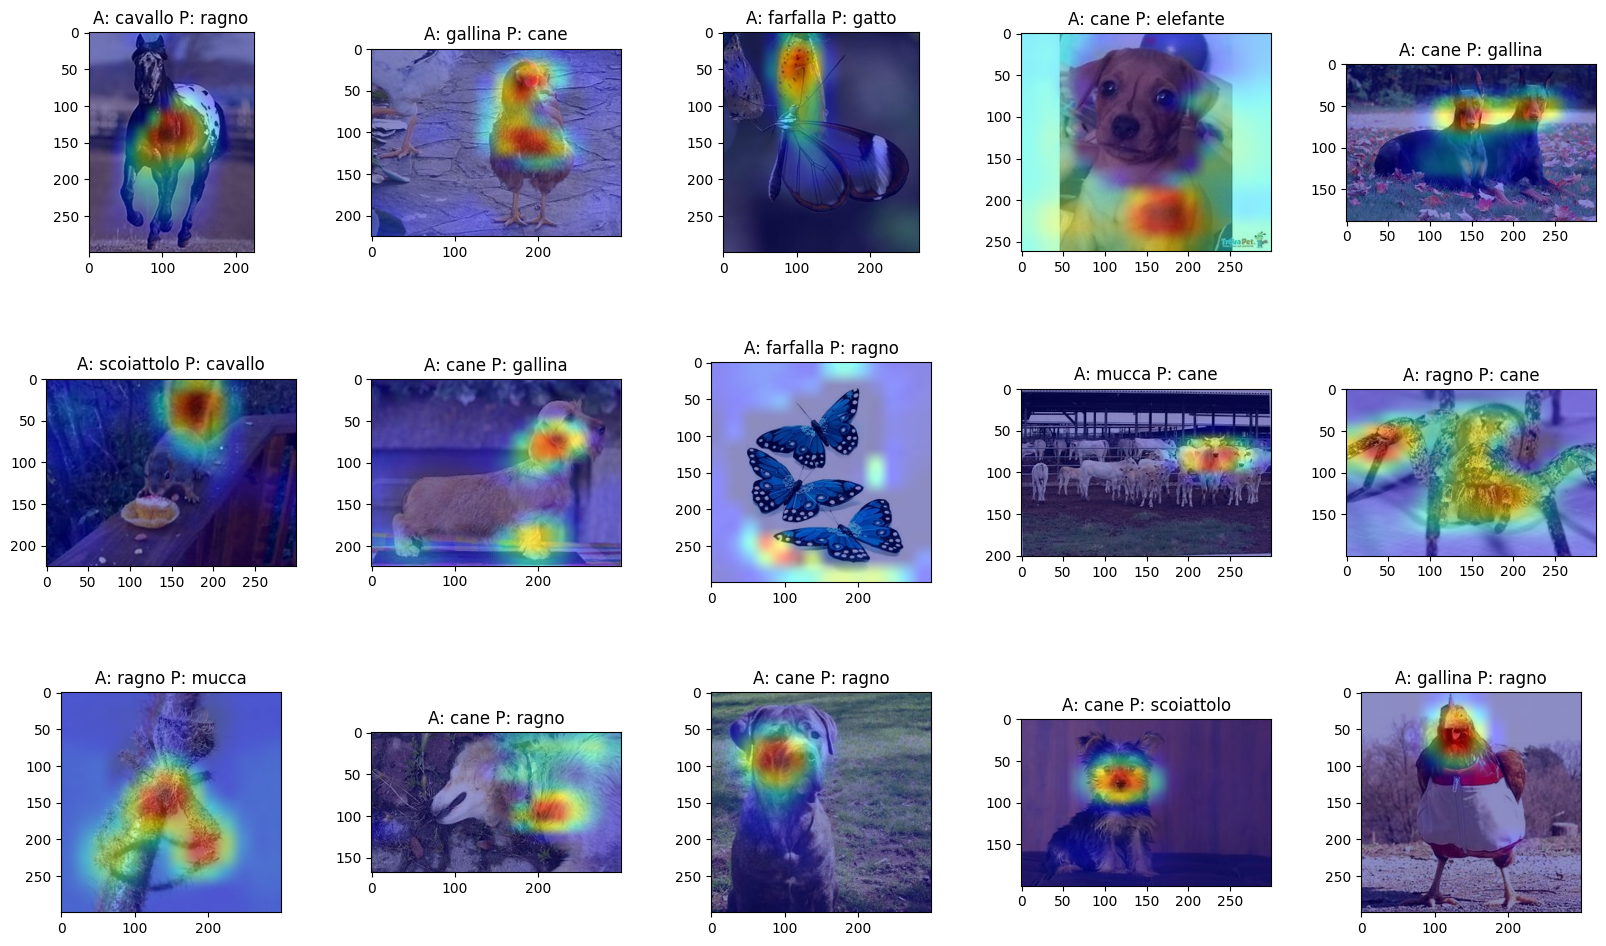

In [40]:
display_heatmaps(misclassified,m_titles)